In [1]:
import pandas as pd  
import tensorflow as tf 
from tensorflow import keras
from keras import Sequential
import matplotlib.pyplot as plt
from keras.layers import Dense

In [2]:
data = pd.read_csv(r"C:\Users\alisa\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.drop(['customerID'],axis = 1 ,inplace = True)

In [6]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
data.TotalCharges = pd.to_numeric(data.TotalCharges,errors = 'coerce')

In [8]:
data.shape

(7043, 20)

In [9]:
Churn_Yes_Tenure = data[data.Churn == 'Yes'].tenure
Churn_No_Tenure = data[data.Churn == 'No'].tenure

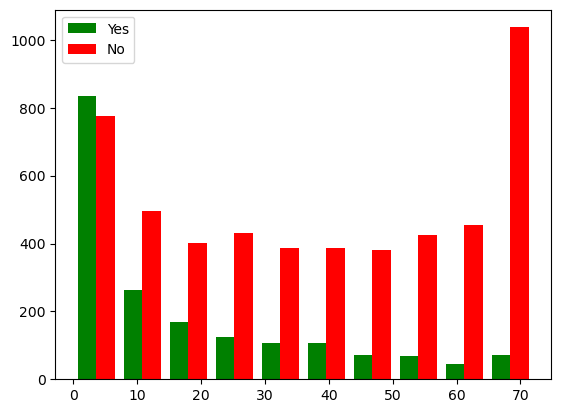

In [10]:
plt.hist([Churn_Yes_Tenure,Churn_No_Tenure],color = ('green','red'),label =['Yes','No'])
plt.legend();

In [11]:
for columns in data:
        print(f"{columns}:{data[columns].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.

In [12]:
data.replace('No internet service','No',inplace = True)


In [13]:
data.replace('No phone service','No',inplace = True)


In [14]:
data.replace({
    'Yes' : 1 ,
    'No' : 0
},inplace = True)

In [15]:
data.replace({
    'Male' : 1,
    'Female':0
},inplace = True)

In [16]:
data1 = pd.get_dummies(data = data , columns = ['InternetService','Contract','PaymentMethod'])

In [17]:
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [18]:
data1.replace({
    True:1,
    False:0
},inplace = True)

In [19]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
data1[['tenure','MonthlyCharges','TotalCharges']] = scale.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])

In [21]:
data1=data1.dropna()

In [22]:
Y = data1['Churn']
X = data1.drop('Churn',axis = 1)

In [23]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [24]:
print(X_train.shape)
print(X_test.shape)

(5625, 26)
(1407, 26)


In [25]:
model = Sequential([
    Dense(20 , input_shape = (26,) , activation = 'relu'),
    Dense(1 , activation = 'sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['Accuracy']
)
model.fit(X_train , Y_train , epochs = 100)

Epoch 1/100
176/176 [==============================] - 2s 3ms/step - loss: 0.5596 - Accuracy: 0.7058
Epoch 2/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4372 - Accuracy: 0.7860
Epoch 3/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4221 - Accuracy: 0.7995
Epoch 4/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4177 - Accuracy: 0.8018
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4158 - Accuracy: 0.8007
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4149 - Accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4131 - Accuracy: 0.8034
Epoch 8/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4122 - Accuracy: 0.8044
Epoch 9/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4110 - Accuracy: 0.8048
Epoch 10/100
176/176 [==============================] - 1s 3ms/step - loss: 0.4106 - Accura

In [26]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 1s 3ms/step - loss: 0.4519 - Accuracy: 0.7754


[0.45188087224960327, 0.7754086852073669]

In [27]:
Yp = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [28]:
Y_pred = []
for i in Yp:
    if i>0.5 :
        Y_pred.append(1)
    else:
        Y_pred.append(0)

In [29]:
Y_pred[:10]

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0]

In [66]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth = 10,max_leaf_nodes =40)
model1.fit(X_train , Y_train)
print(model1.score(X_train , Y_train))
print(model1.score(X_test , Y_test))

0.8236444444444444
0.775408670931059


In [30]:
import seaborn as sns

In [33]:
from sklearn.metrics import classification_report , confusion_matrix
print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.53      0.56       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



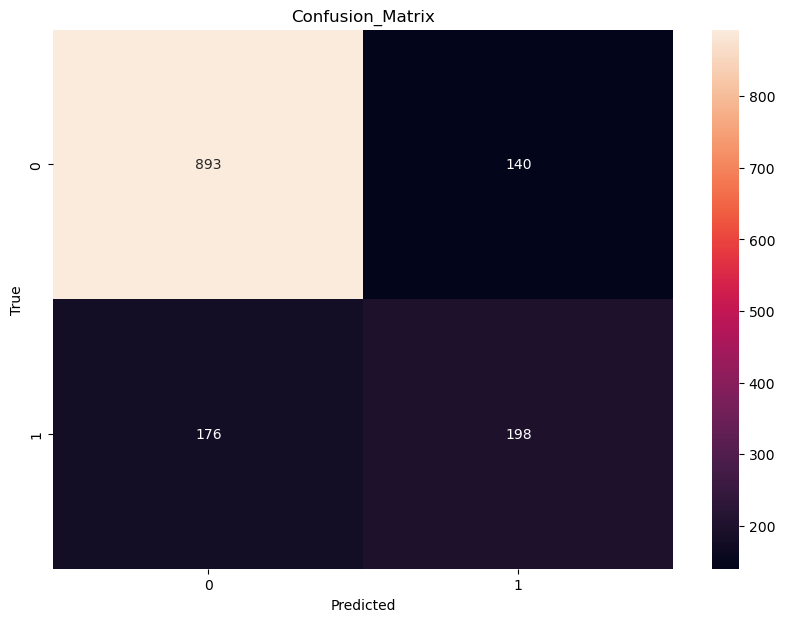

In [38]:
cm = tf.math.confusion_matrix(Y_test , Y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('True');
plt.title("Confusion_Matrix");